## Introduction to the dataset

We will be exploring the Heart Failure Prediction Dataset from kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data). 


Aim: Predicting whether a patient is susceptible to heart failure based on the attributes provided. The problem is a binary classification problem (having a heart disease (1) and not having one (0)). 


Attributes: 

- Age : age of the patient [years]
- Sex : sex of the patient [M: Male, F: Female]
- ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP : resting blood pressure [mm Hg]
- Cholesterol : serum cholesterol [mm/dl]
- FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
- Oldpeak : oldpeak = ST [Numeric value measured in depression]
- ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease : output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 entries, and 12 attributes. We will be using the first 11 attributes to train and predict our target variable HeartDisease. 

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


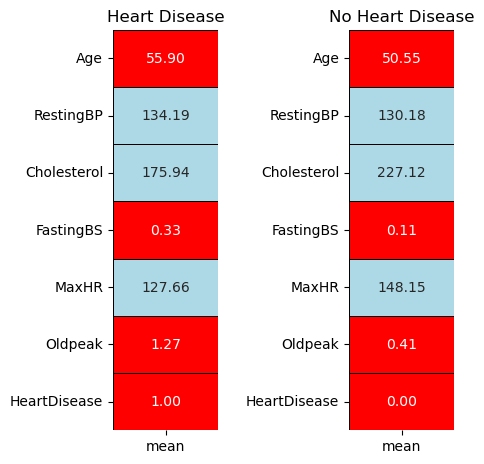

In [11]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#FF0000','#ADD8E6']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)


We can get a rudimentary understanding of the stats from the diagram above:

- The mean age for people with heart disease is higher (55.90 vs 50.55).
- The Resting BP of those with heart disease is also higher (134.19 vs 130.18).
- Lower cholesterol for those with heart disease (which is peculiar, and we will explore this further later on)
- Average Fasting BP is higher for those with heart disease.
- MaxHR is considerably lower for those with heart disease (127.66 vs 148.15), which could correlate to the person's activity and also their age. 
- Higher oldpeak (related to positions on ECG conducted by patients) on those with heart disease.

## Exploratory Data Analysis


We will first delve into the target variable (HeartDisease). This variable is a binary classification where 1 signifies persons with heart disease, and 0 signifies persons without.

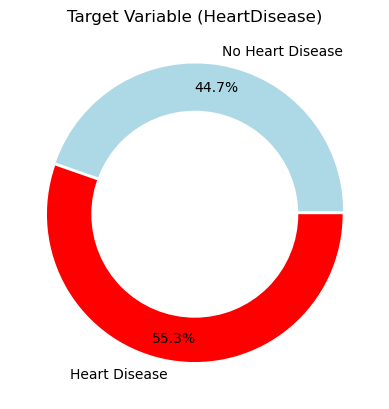

In [27]:
classes = {
    'No Heart Disease': 0,
    'Heart Disease': 1
}

class_pop = [len(data[data['HeartDisease'] == _class]) for _class in classes.values()]

plt.title('Target Variable (HeartDisease)')

plt.pie(
    x=class_pop,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
    pctdistance=0.85,
    colors = ['#ADD8E6', '#FF0000'], 
)

center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig('TargetVar.jpg', dpi=300)
plt.show()

To get a deeper understanding of the data through exploratory data analysis, we will first split the dataset into categorical attributes and numerical attributes. To split the data, we've defined the categorical data to be any attribute that has less than 5 unique elements. 

In [29]:
column = list(data.columns)
categorical_attributes = []
numerical_attributes = []

for i in column:
    if len(data[i].unique()) > 5: 
        numerical_attributes.append(i)
    else: 
        categorical_attributes.append(i)
        
print('Numerical attributes: ', *numerical_attributes)
print('Categorical attributes: ', *categorical_attributes)

Numerical attributes:  Age RestingBP Cholesterol MaxHR Oldpeak
Categorical attributes:  Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease


### Numerical Attributes

First, we'll create a list of numerical attributes.

In [34]:
numericalattributes = data[numerical_attributes]
numericalattributes.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


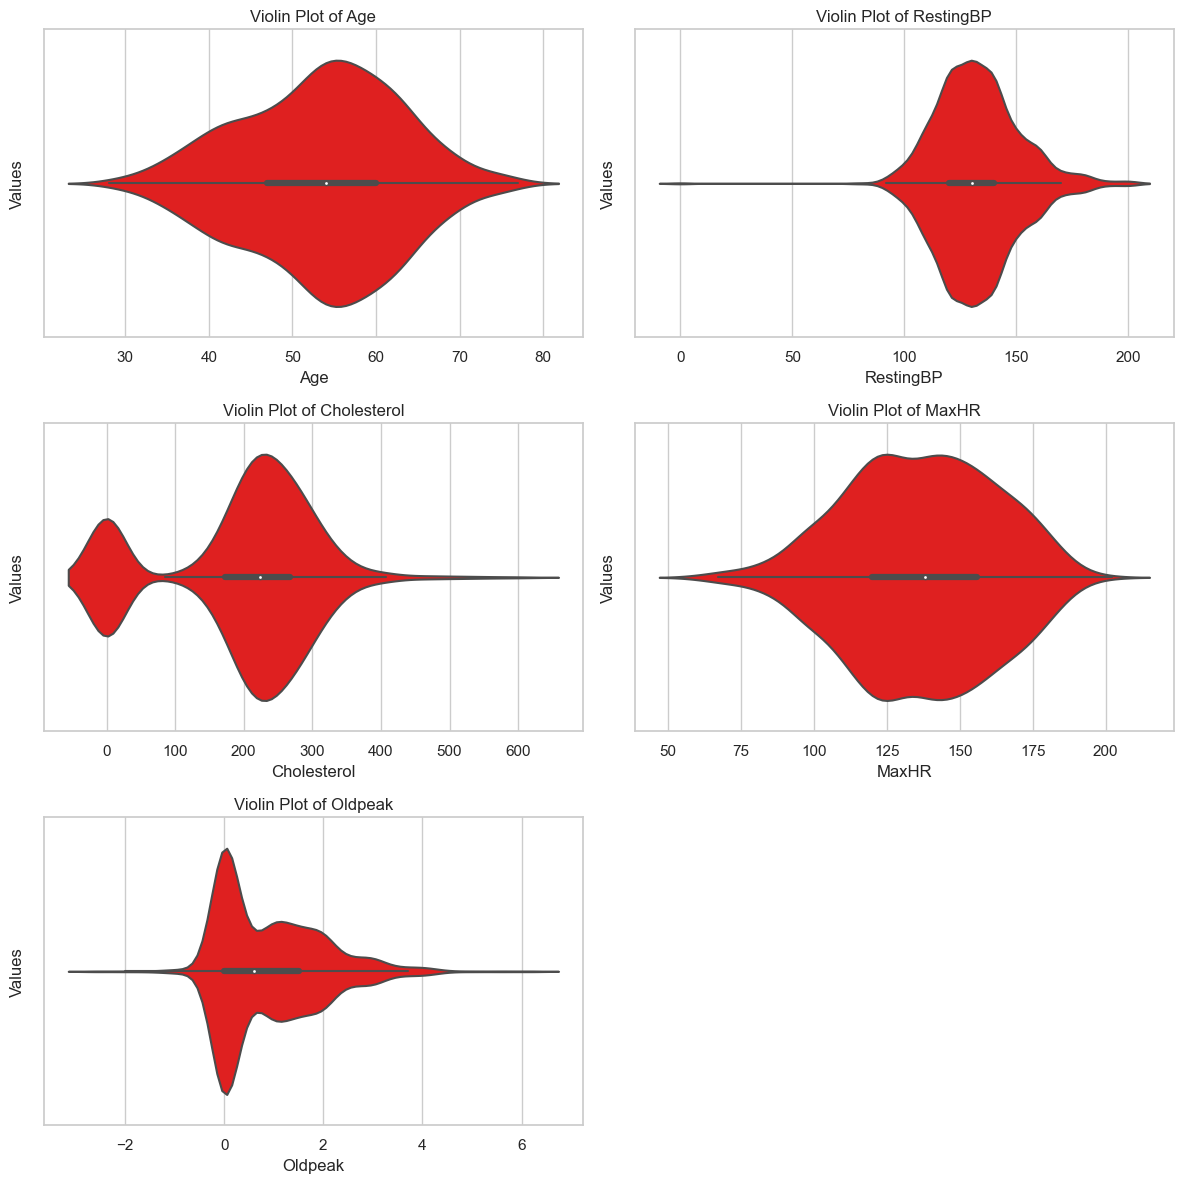

In [51]:
#Drawing a violin plot for numerical attributes so we can look at their distribution
num_rows = len(numerical_attributes) // 2 + len(numerical_attributes) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

# Draw violin plots for each numerical attribute
for i, attr in enumerate(numerical_attributes):
    row = i // num_cols
    col = i % num_cols
    sns.violinplot(x=attr, data=data, ax=axes[row, col], color='red')
    axes[row, col].set_title(f'Violin Plot of {attr}')
    axes[row, col].set_xlabel(attr)
    axes[row, col].set_ylabel('Values')

# Hide empty subplots
for i in range(len(numerical_attributes), num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

From these violin plots we can gather that Age, RestingBP, and MaxHR are somewhat normally distributed. Cholesterol on the other hand seems to be bimodal, and OldPeak is positively skewed. 

Now, let's take a look at the correlation matrix of the numerical attributes so we can find out which variables might be a better indicator of HeartDisease.

In [59]:
corr_data = data[numerical_attributes + ['HeartDisease']].copy()
print(corr_data.head())

   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease
0   40        140          289    172     0.00             0
1   49        160          180    156     1.00             1
2   37        130          283     98     0.00             0
3   48        138          214    108     1.50             1
4   54        150          195    122     0.00             0


In [78]:
import plotly.express as px

correlation_matrix = corr_data.corr()
print(correlation_matrix)

px.imshow(corr_data.corr(),title="Correlation Matrix", color_continuous_scale='blues')

               Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease
Age           1.00       0.25        -0.10  -0.38     0.26          0.28
RestingBP     0.25       1.00         0.10  -0.11     0.16          0.11
Cholesterol  -0.10       0.10         1.00   0.24     0.05         -0.23
MaxHR        -0.38      -0.11         0.24   1.00    -0.16         -0.40
Oldpeak       0.26       0.16         0.05  -0.16     1.00          0.40
HeartDisease  0.28       0.11        -0.23  -0.40     0.40          1.00


Insights:
- Age, RestingBP, and OldPeak have a positive correlation (0.28, 0.11 and 0.40 respectively) with HeartDisease.
- Cholesterol and MaxHR has a negative correlation (-0.23 and -0.40 respectively) with HeartDisease.


We will now explore each numerical variable individually with respect to HeartDisease. For this, we will create a function that takes numerical attributes and creates histograms that will help visualise their correlation with HeartDisease.

In [92]:
def plot_hist(data, attribute):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'p({attribute})')
    sns.histplot(
        data=data, x=attribute,
        kde=True,
        binwidth=5, binrange=(30, data[attribute].max()),
        stat='probability', common_norm=False,
        color='#ADD8E6',
        ax=axes[0]
    )

    plt.subplot(1, 2, 2)
    plt.title(f'p({attribute}|HeartDisease)')
    sns.histplot(
        data=data, x=attribute,
        kde=True,
        binwidth=5, binrange=(30, data[attribute].max()),
        hue='HeartDisease',
        stat='probability', common_norm=False,
        palette={0: '#ADD8E6', 1: '#FF0000'},
        ax=axes[1]
    )

    plt.tight_layout()
    plt.show()

#### Age

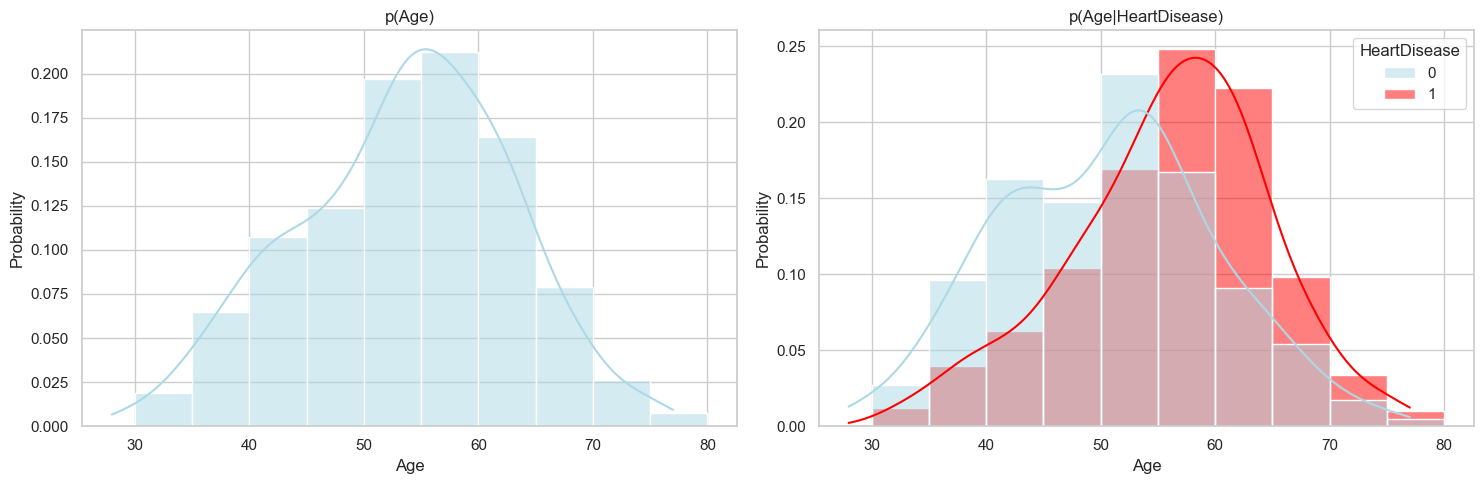

In [93]:
plot_hist(data, 'Age')

Insights: 
- Shows a normal distribution.
- A large majority of the patients are in the 45-65 age range. 
- The histogram of probability of Age given HeartDisease suggests that age becomes a correlatory factor to HeartDisease at 55. Persons past 55 in this dataset are more likely to having a heart disease. 

#### MaxHR

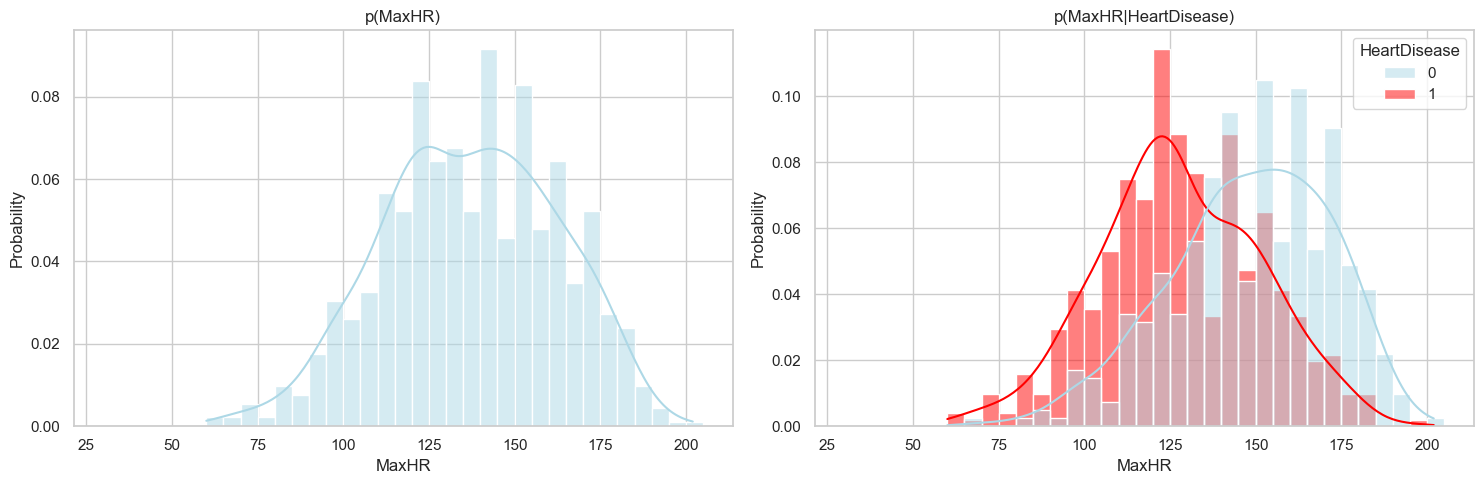

In [94]:
plot_hist(data, 'MaxHR')

Insights: 
- As seen previously, MaxHR has a negative correlation with HeartDisease. This negative correlation is better illustrated in the histogram, where the KDE line for those with HeartDisease is largely towards the left of those without.

Similarly to Age and MaxHR, we will now create a function that helps us visualise RestingBP and OldPeak. This new function will be different from the previous one since for RestingBP and OldPeak, it will be better to simply plot the KDE. 

In [99]:
def plot_kde(data, attribute):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'$p({attribute})$')
    sns.kdeplot(
        data=data, x=attribute,
        ax=axes[0], 
        color='#ADD8E6'
    )

    plt.subplot(1, 2, 2)
    plt.title(f'$p({attribute}|HeartDisease)$')
    sns.kdeplot(
        data=data, x=attribute,
        hue='HeartDisease',
        ax=axes[1], 
        palette={0: '#ADD8E6', 1: '#FF0000'},
    )

    plt.tight_layout()
    plt.show()

#### RestingBP

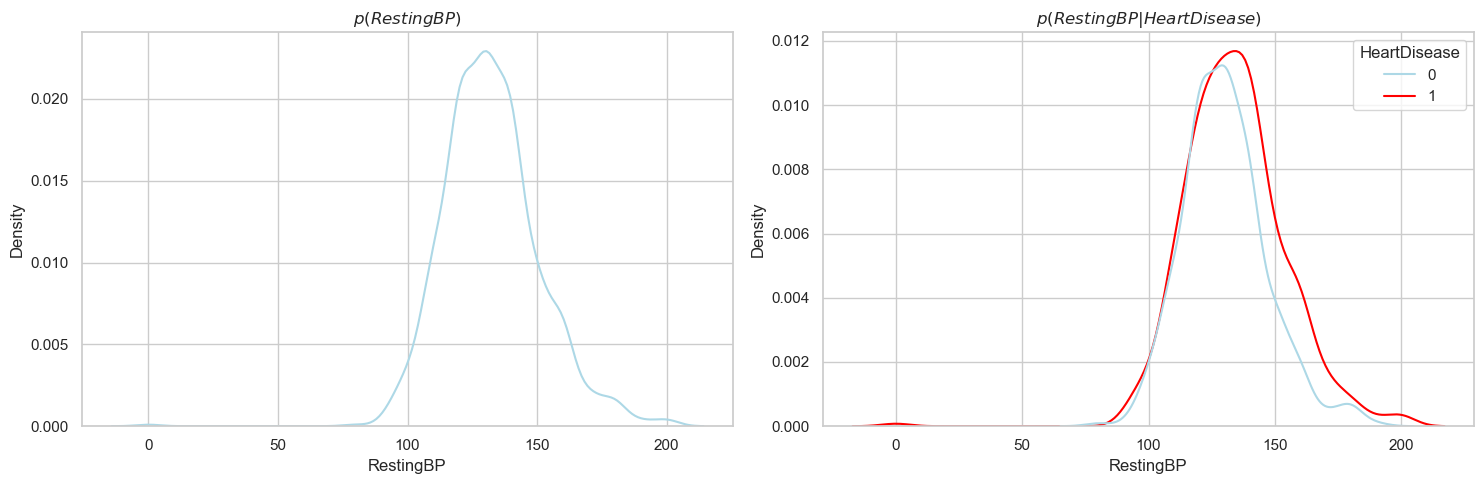

In [100]:
plot_kde(data, 'RestingBP')

Insights: 
- Normal Distribution.
- Persons with Heart Disease have slightly higher average RestingBP (as seen by the red line being to the right of the blue line at most points).

#### OldPeak

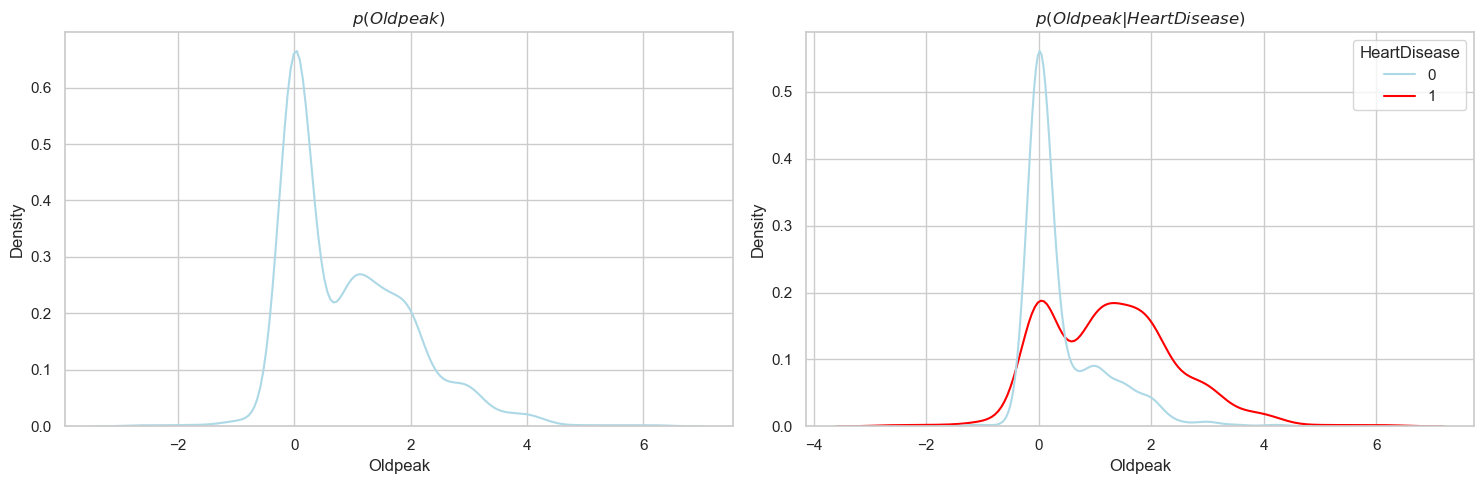

In [102]:
plot_kde(data, 'Oldpeak')

Insights: 
- Irregular distribution (although positively skewed). 
- Persons with Oldpeak close to 0 are very less likely to suffer from heart disease. 
- Persons with HeartDisease largely have an Oldpeak of greater than 0. 

#### Cholesterol

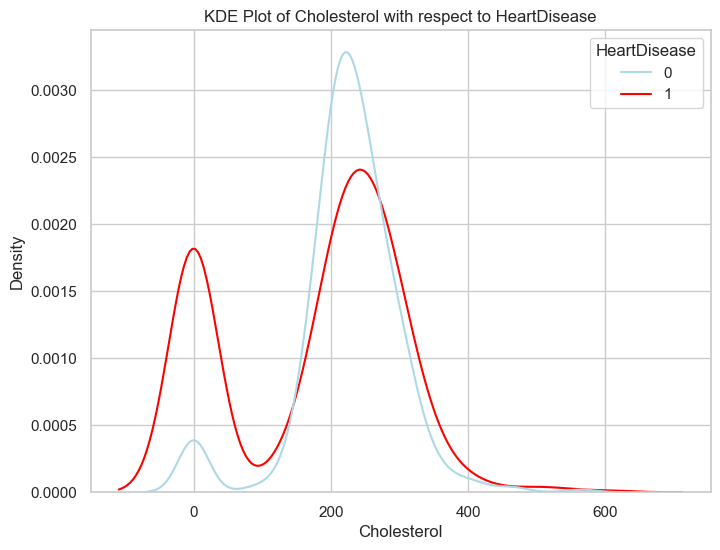

In [124]:
plt.figure(figsize=(8, 6))
plt.title('KDE Plot of Cholesterol with respect to HeartDisease')
sns.kdeplot(
    data=data, x='Cholesterol',
    hue='HeartDisease',
    palette={0: '#ADD8E6', 1: '#FF0000'}
)
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

As we can see, it seems that there is a bimodal distribution of Cholesterol with respect to HeartDisease. 

In [118]:
zero_chol = (data['Cholesterol'] == 0).sum()
print("Number of zero values in the 'Cholesterol' column:", zero_chol)

Number of zero values in the 'Cholesterol' column: 172


As we can see, there are 172 elements in the Cholesterol list with the value 0. In the context of this dataset, these values are actually NULL values that are causing the distribution to be bimodal. In order to gain a better understanding and to clean up the data, we will replace these NULL values with the mean of Cholesterol. 

In [119]:
average_chol = data[data['Cholesterol'] != 0]['Cholesterol'].mean()
data['cholesterol_new'] = data['Cholesterol'].replace(0, average_chol)

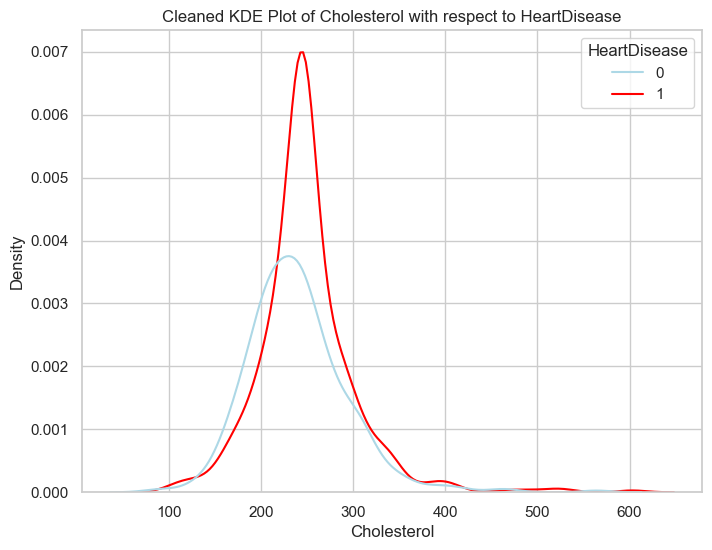

In [125]:
plt.figure(figsize=(8, 6))
plt.title('Cleaned KDE Plot of Cholesterol with respect to HeartDisease')
sns.kdeplot(
    data=data, x='cholesterol_new',
    hue='HeartDisease',
    palette={0: '#ADD8E6', 1: '#FF0000'},
)
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

Insights: 
- Now we can see that there is actually a normal distribution. 
- Furthermore, we can see that those with heart disease have a slightly higher average cholesterol value than those without.

### Categorical Attributes

We will now take a look at the categorical values with respect to HeartDisease. 

In [141]:
categoricalattributes = data[categorical_attributes]
categoricalattributes.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


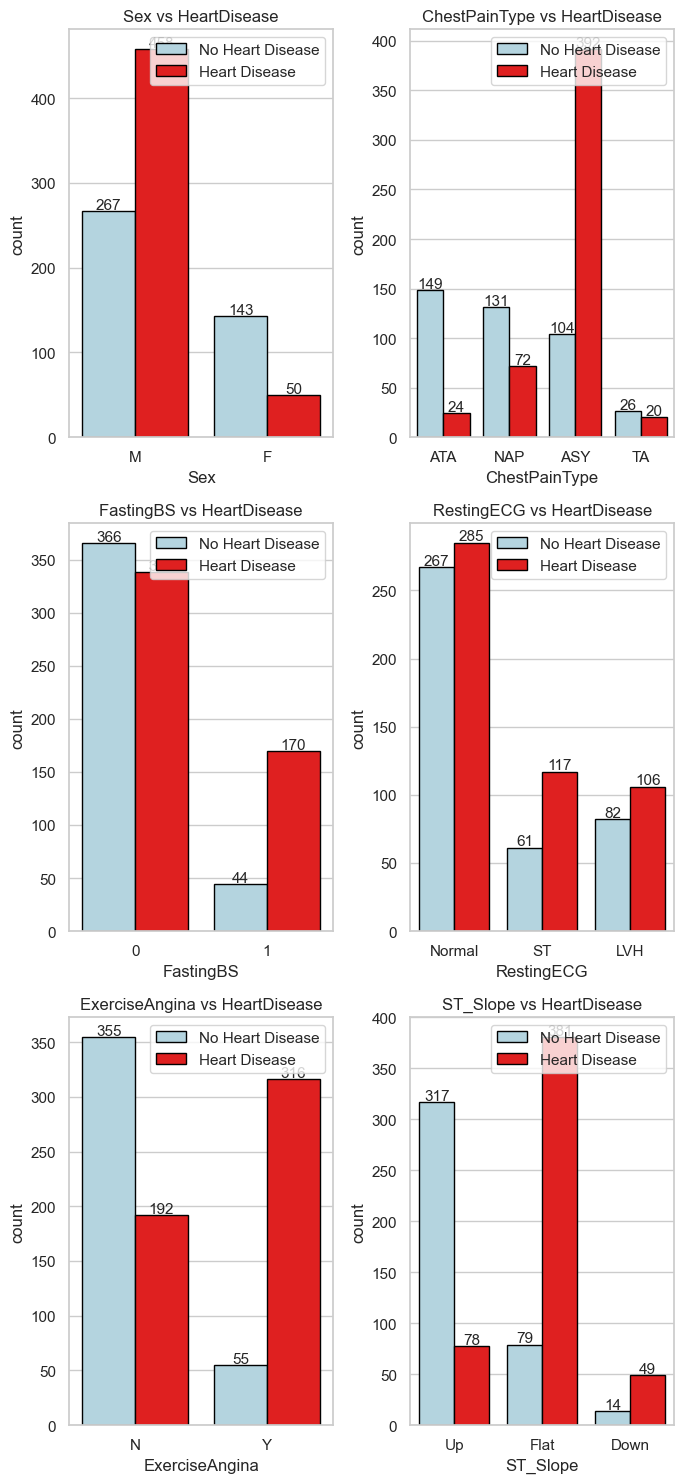

In [156]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 15))

for i, attribute in enumerate(categoricalattributes):
    if i >= len(ax.flat): 
        break
    sns.countplot(x=attribute, data=data, hue='HeartDisease', palette={0: '#ADD8E6', 1: '#FF0000'}, edgecolor='black', ax=ax.flat[i])
    for rect in ax.flat[i].patches:
        ax.flat[i].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize=11)
    title = f'{attribute} vs HeartDisease'
    ax.flat[i].legend(['No Heart Disease', 'Heart Disease'])
    ax.flat[i].set_title(title)

plt.tight_layout()
plt.show()


Insights: 
- Within the male population, 458 out of 725 patients (63%) have heart disease, whereas on the other hand, only 50 out of 193 (26%) women do. An interpretation of this could be that men are more susceptible to heart disease. 
- A majority of those with heart disease (392 out of 508 or 77%) have ASY (Asymptomatic) as a ChestPainType. This could be a good indicator we can explore further later on. 
- Out of those with FastingBS > 120 mg/dl (or in this dataset, a value of 1), 170 out of 214 patients (79%) suffer from heart disease. Those with FastingBS <= 120 mg/dl, the count plot is split relatively in the middle. 
- Furthermore, out of those afflicted by ExerciseAngina, 316 out of 371 (85%) have heart disease. This could be due to the idea that exercise causes a great strain on the circulatory system. 
- Finally, a Flat and Down ST_Slope has 83% and 78% affliction rate (percentage of those with heart disease over the total number of patients in that category). 

In order to gain further insight, we will see how the positive cases of heart disease are split up in each categorical attribute. This will allow us to see whether a particular element in a categorical attribute might be useful in predicting our target variable HeartDisease. 

In [157]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

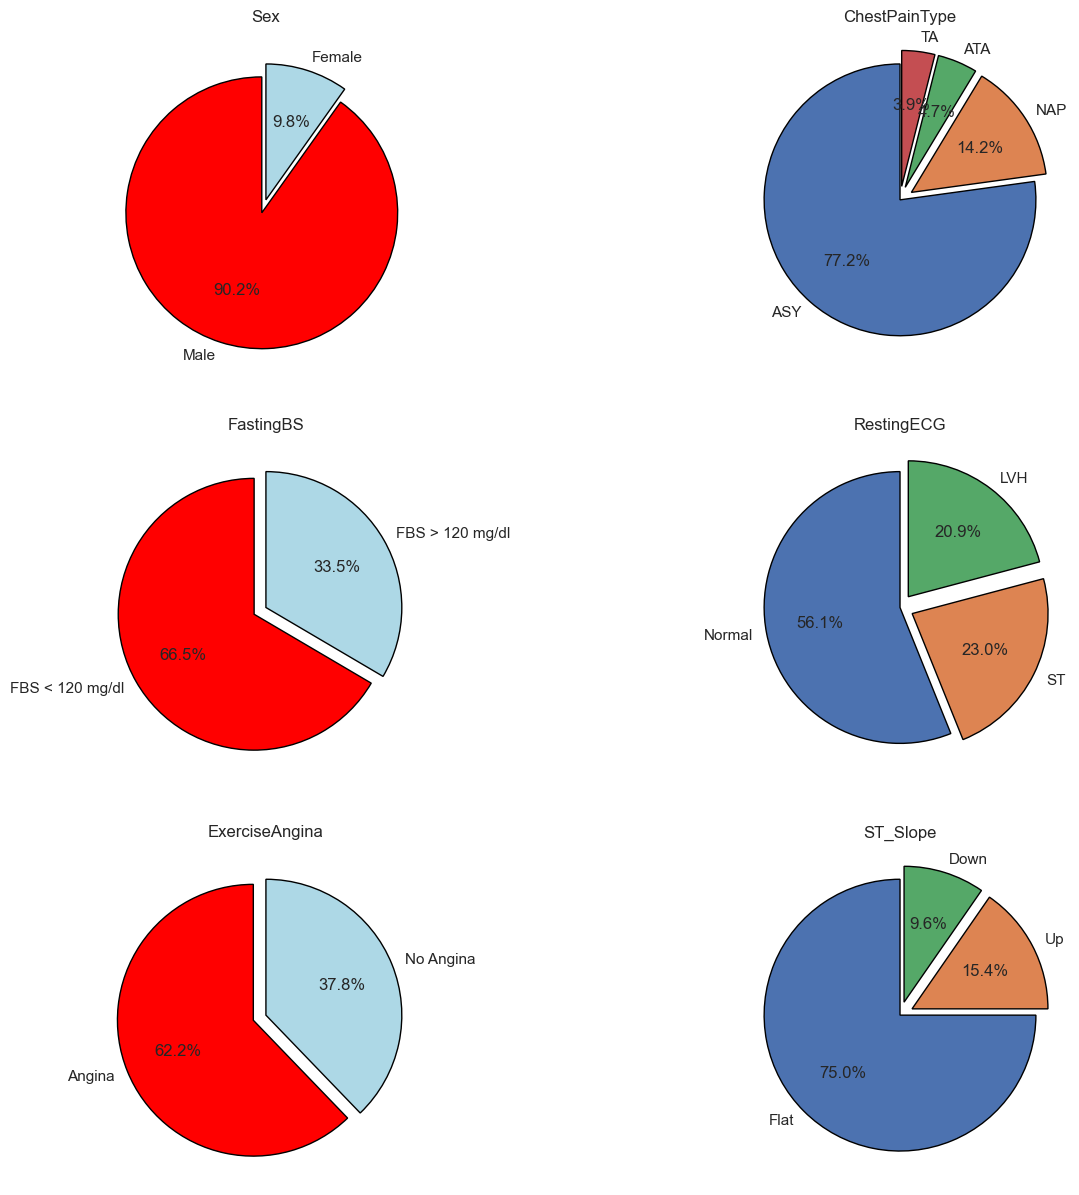

In [175]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))
plt.clf()

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

Insights: 
- 90.2% of heart disease patients are male. 
- 77.2% of those with heart disease have ASY as their ChestPainType
- Fasting Blood Sugar of < 120 mg/dl indicates high chance of heart disease
- Similarly, those with exercise-induced angina have a higher probability of having heart disease. 
- 56.1% of heart disease patients exhibit normal a resting ECG. 
- A flat ST_Slope seems to have a higher correlation with patients having heart disease. 

##### Numerical Attributes of interest from EDA
- Age, Cholesterol, MaxHR, Oldpeak

##### Categorical Attributes of interest from EDA
- Sex, ChestPainType, ST_Slope